In [18]:
from glob2 import glob
import librosa, librosa.display
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.io import wavfile
import numpy as np

In [2]:
emotion_dict = {'happy': [], 'sad': [], 'angry':[]}
for filepath in glob("../data/berlin_speech/wav/*.wav"):
    filename = filepath.split("/")[-1]
    if filename[5]=="F": # Happy/Freude
        emotion_dict["happy"].append(wavfile.read(filepath)[1])
    elif filename[5]=="W": # Anger/Wut
        emotion_dict["angry"].append(wavfile.read(filepath)[1])
    elif filename[5]=="T": # Sad/Traurig
        emotion_dict["sad"].append(wavfile.read(filepath)[1])
    else:
        pass

/Users/karthick/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [3]:
len(emotion_dict['angry']),len(emotion_dict['sad']), len(emotion_dict['happy'])

(127, 62, 71)

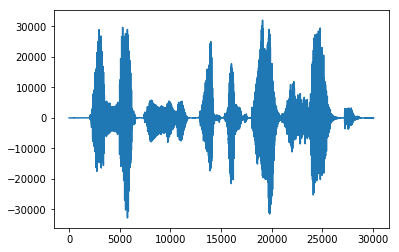

In [4]:
plt.plot(emotion_dict['angry'][0])

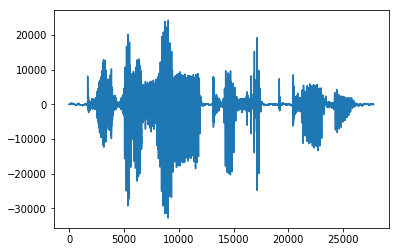

In [14]:
plt.plot(emotion_dict['sad'][0])

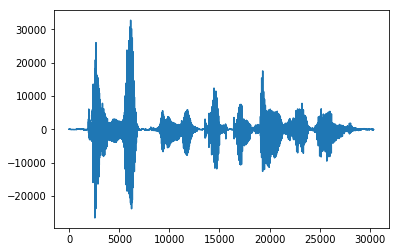

In [6]:
plt.plot(emotion_dict['happy'][0])

### Melspectrogram

In [15]:
def plot_melspectrogram(peak, boolean, sr=96000):
    # S - Mel Spectrogram, sr - sample rate, y = audio time-series, fmax = frequency max to display
    S = librosa.feature.melspectrogram(peak, sr)
    plt.figure(figsize=(10, 4))

    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000,x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    if boolean:
        title = "Mel Spectrogram _ pos peak"
    else:
        title = "Mel Spectrogram _ neg peak"
    plt.title(title)
    plt.tight_layout()
    plt.show()

/Users/karthick/anaconda3/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


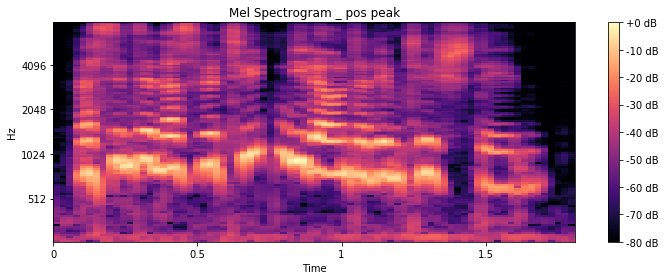

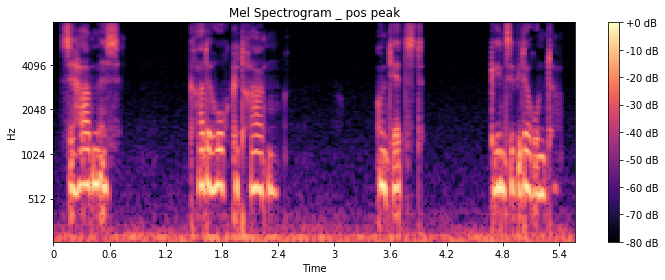

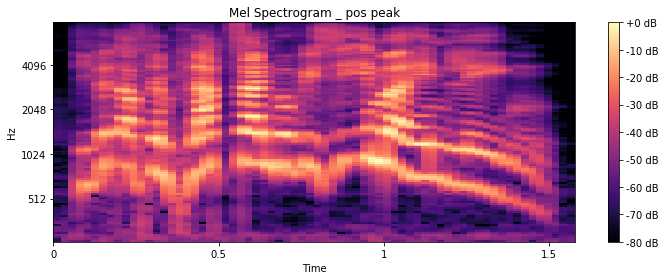

In [20]:
number = 12

# Average of all the peaks
plot_melspectrogram(emotion_dict['happy'][number], True)
plot_melspectrogram(emotion_dict['sad'][number], True)
plot_melspectrogram(emotion_dict['angry'][number], True)

### Mel Frequency ceptstral coefficients

In [21]:
def plot_mfcc(peak, boolean, sr=96000):
    mfccs = librosa.feature.mfcc(peak, sr, n_mfcc=40)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, y_axis='mel', fmax=8000,x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    if boolean:
        title = "MFCC _ pos peak"
    else:
        title = "MFCC _ neg peak"
    plt.title(title)
    plt.tight_layout()
    plt.show()


/Users/karthick/anaconda3/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


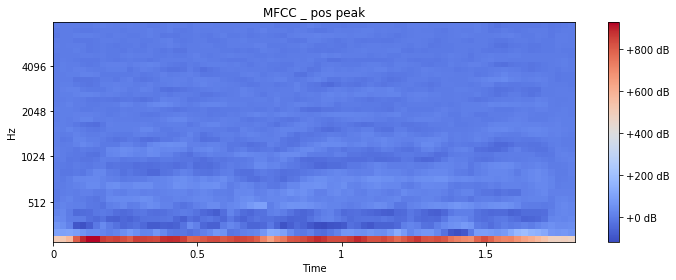

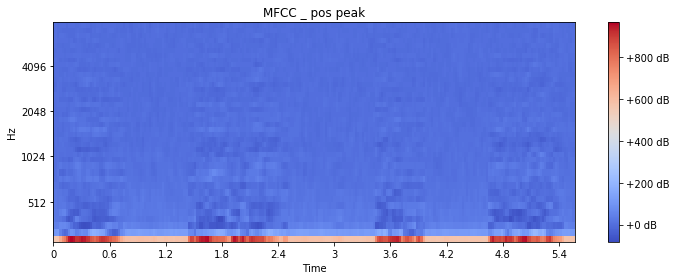

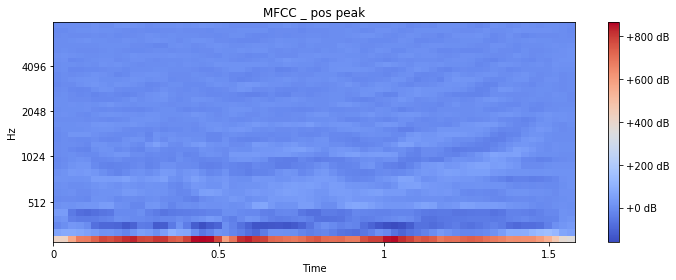

In [22]:
number = 12

plot_mfcc(emotion_dict['happy'][number], True)
plot_mfcc(emotion_dict['sad'][number], True)
plot_mfcc(emotion_dict['angry'][number], True)

### Spectral Contrasts

In [23]:
def plot_spectral_contrasts(peak, boolean, sr=96000):
    S = np.abs(librosa.stft(peak))
    contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(contrast, x_axis= 'time')
    if boolean:
        title = "Spectral contrast _ pos peak"
    else:
        title = "Spectral contrast _ neg peak"
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Frequency bands')
    plt.tight_layout()
    plt.show()

/Users/karthick/anaconda3/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


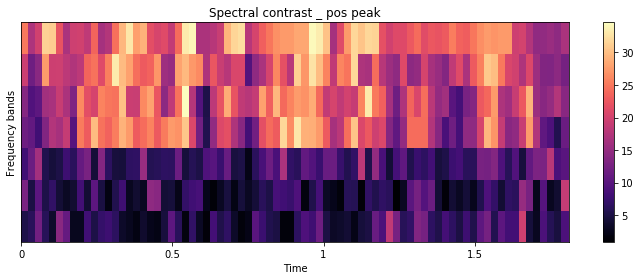

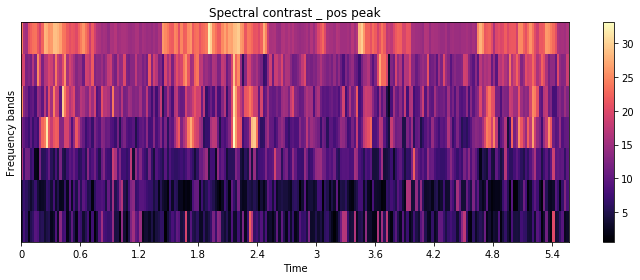

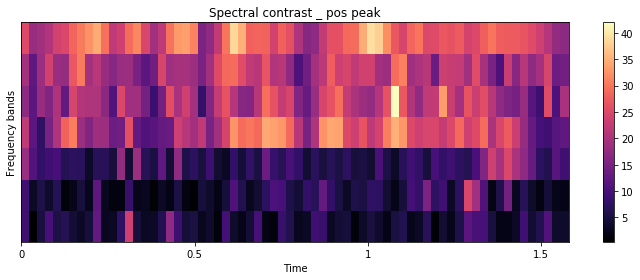

In [24]:
number = 12

plot_spectral_contrasts(emotion_dict['happy'][number], True)
plot_spectral_contrasts(emotion_dict['sad'][number], True)
plot_spectral_contrasts(emotion_dict['angry'][number], True)

### Chroma_STFT

In [25]:
def plot_chromagram(peak, boolean, sr=96000):
    S = np.abs(librosa.stft(peak))
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis= 'time')
    if boolean:
        title = "Chromagram _ pos peak"
    else:
        title = "Chromagram _ neg peak"
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

/Users/karthick/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/karthick/anaconda3/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


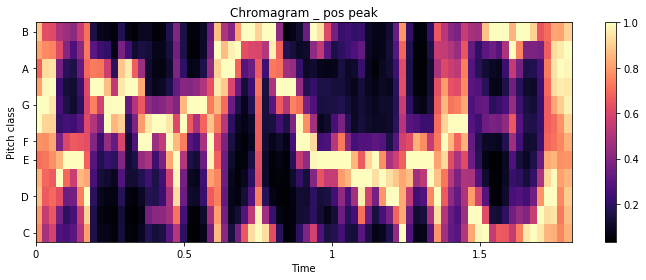

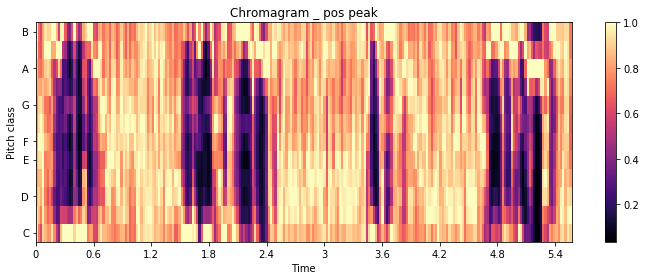

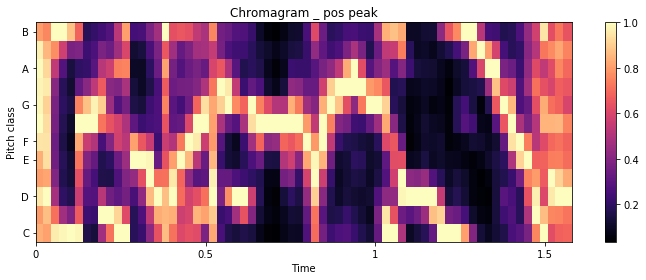

In [28]:
number = 12

plot_chromagram(emotion_dict['happy'][number], True)
plot_chromagram(emotion_dict['sad'][number], True)
plot_chromagram(emotion_dict['angry'][number], True)

### Tonnetz

In [26]:
def plot_tonnetz(peak, boolean, sr=96000):
    peak=librosa.effects.harmonic(peak)
    tonnetz = librosa.feature.tonnetz(y=peak, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis= 'time')
    if boolean:
        title = "Tonal Centroids (Tonnetz) _ pos peak"
    else:
        title = "Tonal Centroids (Tonnetz) _ neg peak"
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

In [31]:
number = 12

plot_tonnetz(emotion_dict['happy'][number], True)
plot_tonnetz(emotion_dict['sad'][number], True)
plot_tonnetz(emotion_dict['angry'][number], True)

/Users/karthick/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):


TypeError: Cannot cast ufunc add output from dtype('float64') to dtype('int16') with casting rule 'same_kind'

### Melspectrogram delta

In [27]:
def plot_delta_melspectrogram(peak, boolean, sr=96000):
    # S - Mel Spectrogram, sr - sample rate, y = audio time-series, fmax = frequency max to display
    S = librosa.feature.melspectrogram(peak, sr)
    S_delta = librosa.feature.delta(S)
    plt.figure(figsize=(10, 4))

    librosa.display.specshow(librosa.power_to_db(S_delta, ref=np.max), y_axis='mel', fmax=8000,x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    if boolean:
        title = "Mel Spectrogram _ pos peak"
    else:
        title = "Mel Spectrogram _ neg peak"
    plt.title(title)
    plt.tight_layout()
    plt.show()

/Users/karthick/anaconda3/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


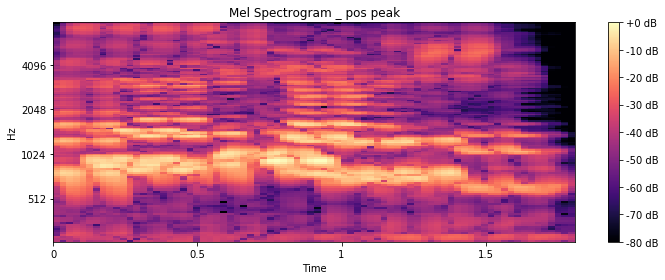

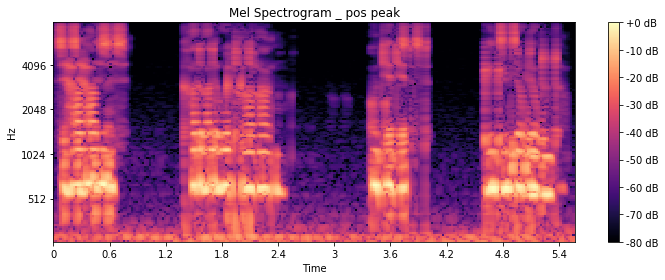

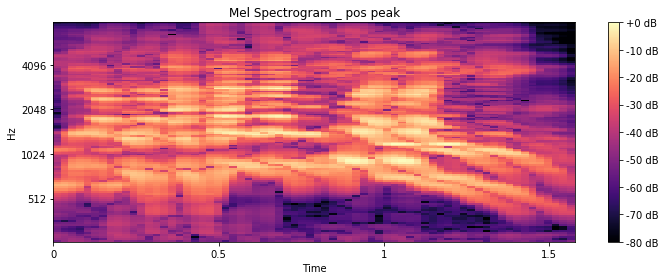

In [30]:
number = 12

plot_delta_melspectrogram(emotion_dict['happy'][number], True)
plot_delta_melspectrogram(emotion_dict['sad'][number], True)
plot_delta_melspectrogram(emotion_dict['angry'][number], True)